### Student Information
Name: 葛洋晴

Student ID: 108006205

GitHub ID: GrayGama

Kaggle name: MarceloGalindo

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)
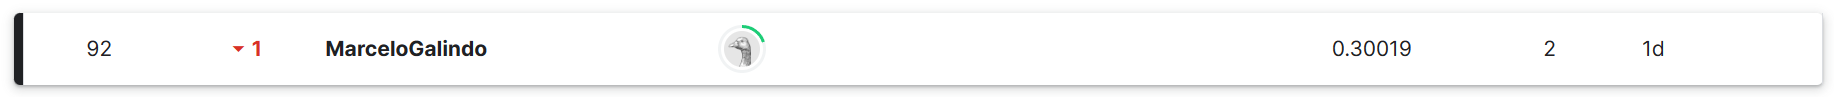

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

## First part: Take Home Exercises

### Imports >> Everything you need to run the cells below  

In [19]:
import pandas as pd
import nltk
from nltk.probability import FreqDist

# %matplotlib inline  # -> For Jupyter Notebook 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import seaborn as sns
import itertools

import keras
from keras.callbacks import CSVLogger
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

from gensim.models import KeyedVectors

In [ ]:
# If you haven't doenloaded please uncommnent and download it from here
# nltk.download('punkt')

### **Exercise 1:**

In [4]:
### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

Text(0, 0.5, 'Frequency')

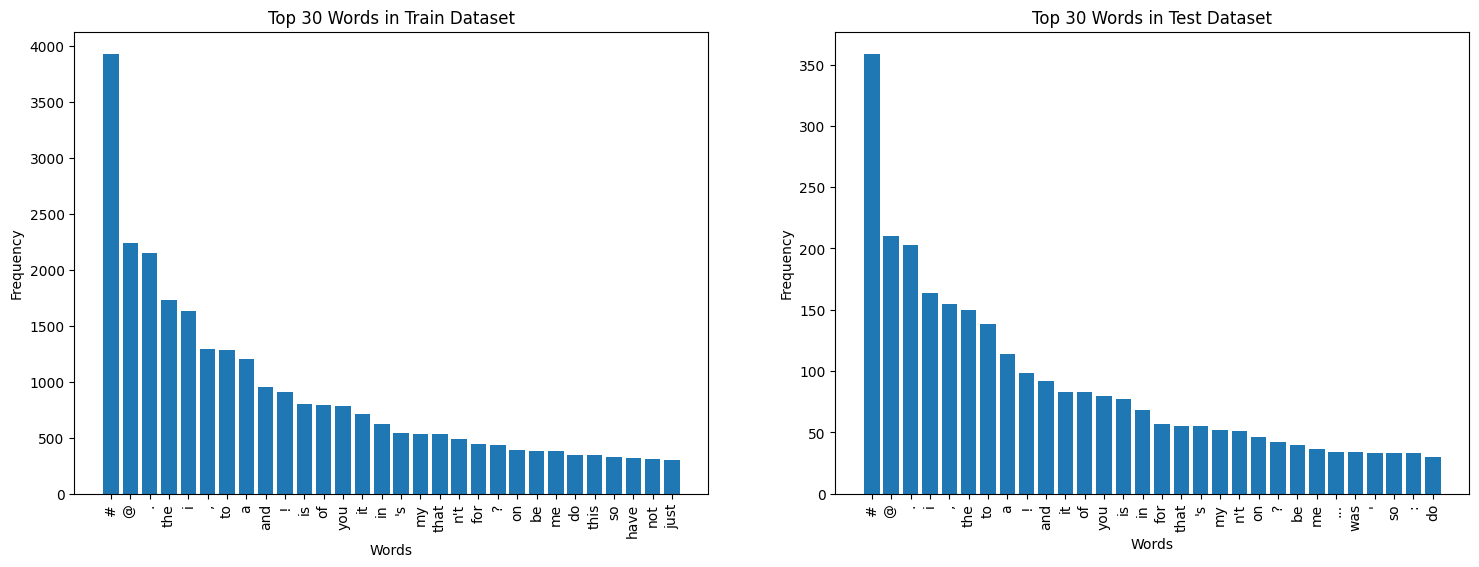

In [5]:
# Answer here
#Changing to lowercase for uniformity, e.g. DOG and dog same word
traindf_lower = train_df["text"].apply(lambda x: x.lower())
testdf_lower = test_df["text"].apply(lambda x: x.lower())
# Tokenizing:
train_token = traindf_lower.apply(nltk.word_tokenize)
test_token = testdf_lower.apply(nltk.word_tokenize)
# flatting the train_token (Series)
all_tokens_train = [token for sublist in train_token for token in sublist]
all_tokens_test = [token for sublist in test_token for token in sublist]
# getting the distribution
train_distribution = FreqDist(all_tokens_train)
test_distribution = FreqDist(all_tokens_test)
#Getting the Top 30
train_top30 = train_distribution.most_common(30)
test_top30 = test_distribution.most_common(30)

# Plotting the data:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.bar(*zip(*train_top30))
plt.xticks(rotation=90)
plt.title('Top 30 Words in Train Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(*zip(*test_top30))
plt.xticks(rotation=90)
plt.title('Top 30 Words in Test Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')

### **Exercise 2:**

In [6]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# The fit_transform method is used on the training data to both fit the vectorizer and transform the data. 
train_data_tfidf_features = tfidf_vectorizer.fit_transform(train_df["text"])

test_data_tfidf_features = tfidf_vectorizer.transform(test_df["text"])

tfidf_feat_names = tfidf_vectorizer.get_feature_names_out()

print(tfidf_feat_names[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


### **Exercise 3:**

>**Answer:**
My assessment is that, the diagonal of the confusion matrix represent the amount of correct predictions of the model, while positions outside are misclassifications and how many in favor of another class. In addition, in the representation above following the colors and the mapping based on frequency, darker color represent higher numbers while brighter color represent less frequency. Doing it in this way, the task of visualizing frequencies becomes faster and more understandable.   

### **Exercise 4:**

In [8]:
# Function for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

s:\Programs\anaconda3\envs\DMLab2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



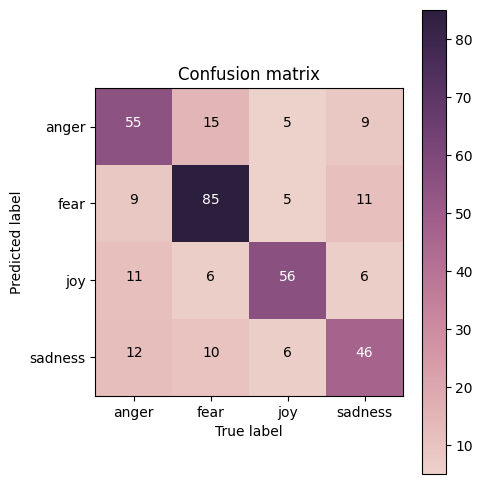

In [9]:
# Answer here
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X2_train = BOW_500.transform(train_df['text'])
y2_train = train_df['emotion']

X2_test = BOW_500.transform(test_df['text'])
y2_test = test_df['emotion']
#training
NaiveB = MultinomialNB()
NaiveB.fit(X2_train, y2_train)
#predicting
y2_train_pred = NaiveB.predict(X2_train)
y2_test_pred = NaiveB.predict(X2_test)

# Evaluation:
acc_train = accuracy_score(y_true=y2_train, y_pred=y2_train_pred)
acc_test = accuracy_score(y_true=y2_test, y_pred=y2_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y2_test, y_pred=y2_test_pred))

cm = confusion_matrix(y_true=y2_test, y_pred=y2_test_pred) 
# plot of confusion matrix
plot_labels = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=plot_labels, title='Confusion matrix')

### **Exercise 5:**

> **Answer:**
We take to look at several aspects such as the true positives (diagonal elements), the false positives and false negatives (off-diagonal elements), For both models, 'fear' seems to be predicted with high accuracy. However, the Naive Bayes model has a higher true positive count for 'fear' (85 vs. 76). The sum of each row in the confusion matrix gives the total number of predictions for that class. It seems that the Naive Bayes model may have a slightly better balance of predictions across classes, especially for 'joy' and 'sadness'. The differences in performance can be given to how each model handles the data. Naive Bayes assumes independence between features and tends to perform well even with smaller datasets. On the other hand, Decision Trees make no such assumption and can capture more complex patterns, but they are also prone to overfitting.

### **Exercise 6:**

input_shape:  500
output_shape:  4
Epoch 1/50
113/113 [==============================] - 1s 2ms/step - loss: 1.3242 - accuracy: 0.3772 - val_loss: 1.2771 - val_accuracy: 0.4352
Epoch 2/50
113/113 [==============================] - 0s 1ms/step - loss: 0.9709 - accuracy: 0.6441 - val_loss: 0.9108 - val_accuracy: 0.6513
Epoch 3/50
113/113 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.7924 - val_loss: 0.7848 - val_accuracy: 0.7176
Epoch 4/50
113/113 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8475 - val_loss: 0.7946 - val_accuracy: 0.6945
Epoch 5/50
113/113 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8804 - val_loss: 0.8609 - val_accuracy: 0.6772
Epoch 6/50
113/113 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.9026 - val_loss: 0.8752 - val_accuracy: 0.6945
Epoch 7/50
113/113 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.9247 - val_loss: 0

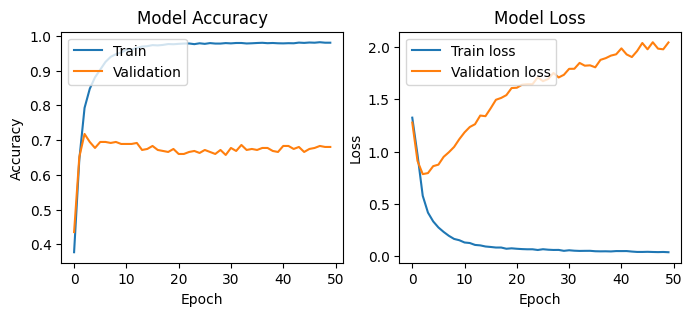

In [21]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# input layer
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 50
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


plt.figure(figsize=(8, 3))
# Summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')

# Show the plot
plt.show()

### **Exercise 7:**

> Answer: 
Here are some approaches:
1. Averaging Word Vectors: One simple and effective way to represent sentence data is to average the word vectors of all the words in the sentence. This gives you a single vector that summarizes the whole sentence.
2. Weighted Averaging (TF-IDF Weighting): weight the word vectors by the importance of each word in the sentence, which reduces the weight of common words and increases the weight of important words in the sentence.
3. Summing Word Vectors: similar to averaging but without dividing by the number of words. It may lead to a representation where the magnitude of the vector could correspond to sentence length. 
4. Pre-trained Transformers: models like BERT or GPT.

### **Exercise 8:**

load ok


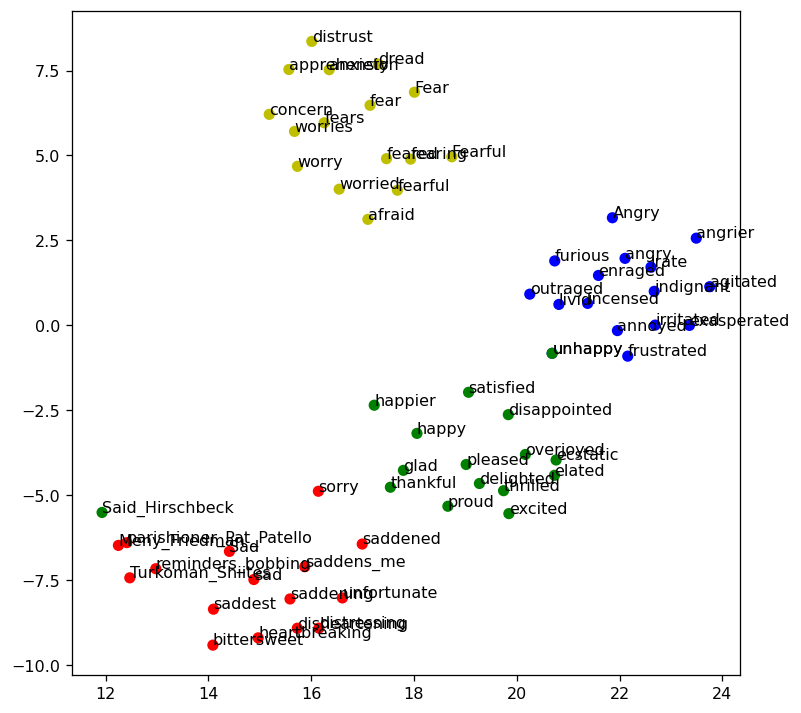

In [20]:
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]   
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        



target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


## Second Part: Kaggle Competition

### Imports >>

In [10]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


### Loading data

In [55]:
# CSV files
data_identif = pd.read_csv("../dm2023-isa5810-lab2-homework/data_identification.csv")
emotions = pd.read_csv("../dm2023-isa5810-lab2-homework/emotion.csv")
sampSubmission = pd.read_csv("../dm2023-isa5810-lab2-homework/sampleSubmission.csv")
# JSON file
tweet_df = pd.read_json("../dm2023-isa5810-lab2-homework/tweets_DM.json", lines=True)

# data_identif.head()
# # emotions.head()
# # sampSubmission.head()

In [32]:
sampSubmission.shape

(411972, 2)

### Pre-processing

In [56]:
# Further processing the tweet_df
tweet_df["tweet_id"] = tweet_df["_source"].apply(lambda x: x["tweet"]["tweet_id"])
tweet_df["text"] = tweet_df["_source"].apply(lambda x: x["tweet"]["text"])
tweet_df["hashtags"] = tweet_df["_source"].apply(lambda x: x["tweet"]["hashtags"])

tweet_df_proc = tweet_df.drop(['_source', '_index', '_crawldate', '_type'], axis=1)

In [57]:
# Merging data
merged_tweets = pd.merge(tweet_df_proc, data_identif, on='tweet_id')
merged_tweets = pd.merge(merged_tweets, emotions, on='tweet_id', how='left')

train_df = merged_tweets[merged_tweets['identification'] == 'train']
test_df = merged_tweets[merged_tweets['identification'] == 'test']

# Further processing:
train_df_proc = train_df.drop('identification', axis=1)
test_df_proc = test_df.drop('identification', axis=1)

In [58]:
# merged_tweet.isnull()
# merged_tweets
# train_df_proc.shape
# test_df_proc.shape

(411972, 5)

In [59]:
train_df_proc.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

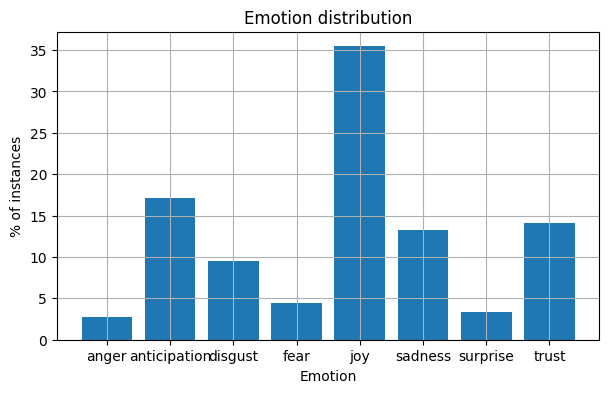

In [15]:
# the histogram of the data
labels = train_df_proc['emotion'].unique()
post_total = len(train_df)
df1 = train_df_proc.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(7,4))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [60]:
# Get the number of instances for the least represented class
min_class_size = train_df_proc['emotion'].value_counts().min()

# Let's balance the data
traindf_balanced = pd.DataFrame()

for emotion in train_df_proc['emotion'].unique():
    subset = train_df_proc[train_df_proc['emotion'] == emotion]
    traindf_balanced = pd.concat([traindf_balanced, subset.sample(min_class_size)])

In [61]:
traindf_balanced.shape
# test_df_proc.shape

(318936, 5)

### Word Vector initializing (BOW)

In [63]:
# build analyzers (bag-of-words)
# BW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

X_tr = BW_1000.fit_transform(traindf_balanced["text"])
y_tr = traindf_balanced["emotion"]

X_tst = BW_1000.transform(test_df_proc["text"])
y_tst = test_df_proc["emotion"]

In [64]:
y_tst.shape
# y_test_hat.shape

(411972,)

### Training and Prediction

In [65]:
RForest_model = RandomForestClassifier(n_estimators=100, random_state=1)
RForest_model.fit(X_tr, y_tr)

y_tr_hat = RForest_model.predict(X_tr)
y_tst_hat = RForest_model.predict(X_tst)

In [ ]:
# acc_tr = accuracy_score(y_true=y_tr, y_pred=y_tr_hat)
# acc_tst = accuracy_score(y_true=y_tst, y_pred=y_tst_hat)

# print('training accuracy: {}'.format(round(acc_tr, 2)))
# print('testing accuracy: {}'.format(round(acc_tst, 2)))
 
# print(classification_report(y_true=y_tst, y_pred=y_test_hat))

In [66]:
y_tst_hat.shape

(411972,)

### CSV Submission 

In [67]:
submission = pd.DataFrame({'id': test_df["tweet_id"], 'emotion': y_tst_hat})
submission.to_csv('Marcelo_RF_Submission.csv', index=False) 

## Third part: **Report of the Competition**

For the competition we were offered with a dataset that contained relevant information about *tweets*, *id*, the *emotion* related with the tweet and to what set does the data belong to. 

In the following paragraph I'd describe the process I went through combine with the insights I gained. 

#### ***Loading the data*** 
The first task was loading the .csv files using pandas and using their related method for reading .csv files, the data would be loaded into a Data frame. The file with the name *“tweets_DM.json”*, however, is not as straight forward to read compared to the other .csv files. To successfully load it I used the pandas method “.read_json”, with the parameters *“line”* as *True*. Given the structure of the data this parameter is important when reading a JSON file where each line is a valid JSON object (also known as JSON Lines format, or newline-delimited JSON).

#### ***Pre-processing*** 
For the pre-processing step, once the file was successfully loaded, we would extract the important features. In this case, the Data frame that we created using the *.read_json* method from pandas, has a tweet column with nested information. By feature engineering, I added three additional columns to the Data frame where the extracted data from the nested information is going to be organized. I created the columns with the name “tweet_id”, “text”, and “hashtag” to put the extracted information. And last, drop the columns that are not relevant for our task. The line: \
*tweet_df.drop(['_source', '_index', '_crawldate', '_type'], axis=1)* does this work.

Now, with the Data frames that contain the tweets_id, text, hashtag, emotion, and an identification. I merge all these features and create a new Data Frame. Next step is just identifying whether a line from my just created Data Frame belongs to the Training set or the Testing set.  

By the method *.groupby(…).count[…]* I tried to visualize the data distribution. From there the “joy” emotion has more instances compared to the “anger” emotion, which is the emotion with fewer instances. After plotting the distribution it is clear the data is imbalanced, which can create biased if we train a model using the data in this state. To address this issue I make use of the *.sample()* method to, as the name suggest, sampling the data and making it balanced. (You can see cell outputs in this notebook for more details)


#### ***Training and Prediction*** 
This process also includes tokenizing and embedding the “text” feature into a vector. In this case, I used Bag of Words for my embedding, with a max feature of 1000 and by using the tokenizer from NLTK library. 

Once the Vectorizer is made, is necessary to fit it and transform it into data that the model can use. For training we are going to take the “text” feature from our Data Frame and the true labels come from “emotion”.

The model that I used is a Random Forest Classifier from Scikit-learn, with a total of 100 estimators and with it random state set to 1. Random forest is known for it ease of use, and robust performance across a wide range of problems. They work well for a wide range of data items because they handle the bias-variance tradeoff quite nicely. However, Random Forest models can be quite complex and contain hundreds or even thousands of trees, which can make them computationally intensive and slow to train on large datasets.

#### ***CSV Submission*** 
By taking the labels predicted by the random forest (*y_tst_hat*), I prepared the .csv file using *.to_csv* pandas method and submitted my file to the Kaggle competition. 


